# SUFT UP CHALLENGE 

#### Import Dependecies

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

#### Prepare Connection with Create _Engine(  ) fuction

In [5]:
#prepares the database connection with create_engine() function. 
engine = create_engine("sqlite:///hawaii.sqlite")

####  Create Base class for Auto_Map (  ) schema &  Reflect our tables with the prepare() function.

In [6]:
# reflect an existing database into a new model with automap_base() function
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

#### View Classes Found by Automap

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

#### Save References to Each Table

In [8]:
# Save references to each table by creating  new variables, 
Measurement = Base.classes.measurement
Station = Base.classes.station

#### Create Session Link to the Database

In [9]:
# Create our session (link) from Python to the DB 
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [11]:
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
#print(results.all())

In [12]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results) 

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [13]:
# Saprint(results.all())ve the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df.head(3)

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08


In [14]:
#sort the data 
df = df.sort_index()
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

#### Plot the Data


<AxesSubplot:xlabel='date'>

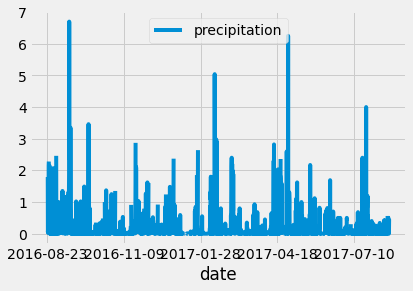

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

#### Generate the Summary

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Find the Number of Stations


In [17]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

#### Determine the Most Active Stations

In [18]:
# What are the most active stations?
session.query(Measurement.station, func.count(Measurement.station))
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station)
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

##### Find Low, High, & Avg Temp

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281')
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

#### Plot the Highest Number of Observations

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.tobs)
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281')
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
#print(results)

In [21]:
#Convert data to data frame 
df = pd.DataFrame(results, columns=['tobs'])
df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


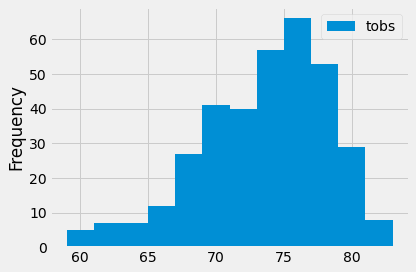

In [22]:
#plot Data 
df.plot.hist(bins=12)
plt.tight_layout()

# CHALLENGE

# D1: Determine the Summary Statistics for June Temperature 

In [46]:
#1.Import the sqlalchemy extract function.
from sqlalchemy import extract
#2.Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
#3.Convert the June temperatures to a list.
june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)
june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
june_results

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [47]:
# 4.Create a DataFrame from the list of temperatures for the month of June. 
june_results_df = pd.DataFrame(june_results, columns=['date','temperature'])
june_results_df

,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [48]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_results_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [49]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
# 7. Convert the December temperatures to a list.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
dec_results

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [51]:
# 8. Create a DataFrame from the list of temperatures for the month of December. n\
dec_results_df = pd.DataFrame(dec_results, columns=['date','temperature'])
dec_results_df

,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [52]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_results_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# END OF CHALLENGE 

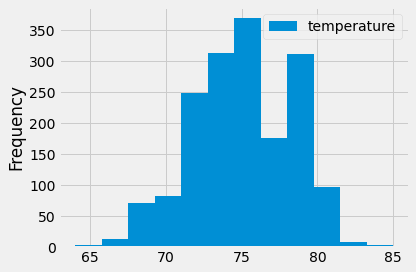

In [71]:
#plot Data 
june_results_df.plot.hist(bins=12)
plt.tight_layout()

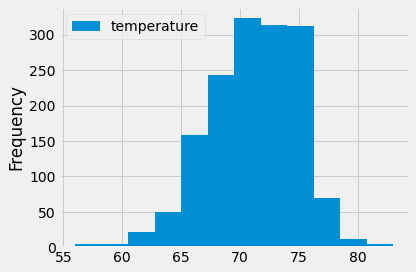

In [72]:
#plot Data 
dec_results_df.plot.hist(bins=12)
plt.tight_layout()

## BONUS Precipitation Stats for June 

In [58]:
#1.Import the sqlalchemy extract function.
from sqlalchemy import extract
june_results_pcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6)
june_results_pcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
june_results_pcp_df = pd.DataFrame(june_results_pcp, columns=['date','precipitation'])
# Sort the dataframe by date
june_results_pcp_df.set_index(june_results_pcp_df['date'], inplace=True)
june_results_pcp_df

,date,precipitation
date,,
2010-06-01,2010-06-01,0.00
2010-06-02,2010-06-02,0.01
2010-06-03,2010-06-03,0.00
2010-06-04,2010-06-04,0.00
2010-06-05,2010-06-05,0.00
...,...,...
2017-06-26,2017-06-26,0.02
2017-06-27,2017-06-27,0.10
2017-06-28,2017-06-28,0.02


In [59]:
# Calculate and print out the summary statistics for the June PCP DataFrame.
june_results_pcp_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


## D2: Determine the Summary Statistics for December

In [68]:
# Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results_pcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12)

In [69]:
# Convert the December temperatures to a list.
dec_results_pcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
dec_results_pcp
#Create a DataFrame from the list of PCP for the month of December. 
dec_results_pcp_df = pd.DataFrame(dec_results_pcp, columns=['date','precipitation'])
# Sort the dataframe by date
dec_results_pcp_df.set_index(dec_results_pcp_df['date'], inplace=True)
dec_results_pcp_df

,date,precipitation
date,,
2010-12-01,2010-12-01,0.04
2010-12-03,2010-12-03,0.00
2010-12-04,2010-12-04,0.00
2010-12-06,2010-12-06,0.00
2010-12-07,2010-12-07,0.00
...,...,...
2016-12-27,2016-12-27,0.14
2016-12-28,2016-12-28,0.14
2016-12-29,2016-12-29,1.03


In [70]:
# Calculate and print out the summary statistics for the Decemeber PCP DataFrame.
dec_results_pcp_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
